In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
%config InlineBackend.figure_format = 'svg'  # Looks MUCH better than retina
# %config InlineBackend.figure_format = 'retina'

from sklearn import tree

import dtreeviz
from dtreeviz import decision_boundaries


### Load the Data set
df = pd.read_csv("diabetes.csv")

In [37]:
df = df.loc[df['BMI'] > 0]
df = df.loc[df['BloodPressure'] > 0]
df = df.loc[df['Glucose'] > 0]

In [44]:
from sklearn.model_selection import train_test_split
X = df[['BloodPressure', 'Age', 'Insulin', 'Glucose', 'BMI', 'Pregnancies', 'SkinThickness', 'DiabetesPedigreeFunction']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=0, criterion='entropy')
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [45]:
ccp_alphas

array([0.        , 0.00336799, 0.00345423, 0.00345423, 0.00345423,
       0.00405616, 0.00417484, 0.00419236, 0.00436844, 0.00439578,
       0.00460564, 0.00461424, 0.00475801, 0.00475801, 0.00475801,
       0.00518135, 0.00541927, 0.0055001 , 0.00560468, 0.00562067,
       0.00567695, 0.00568644, 0.00576523, 0.00588931, 0.00595561,
       0.00600572, 0.00613143, 0.00617312, 0.00636841, 0.00655707,
       0.00673598, 0.00686159, 0.00690846, 0.00700175, 0.00701389,
       0.00727492, 0.00730205, 0.00774513, 0.00787261, 0.00812441,
       0.00893926, 0.00916628, 0.00917381, 0.00926143, 0.00951602,
       0.00984079, 0.01006376, 0.01091151, 0.01205413, 0.01297289,
       0.0178102 , 0.02013759, 0.02667858, 0.03881925, 0.05638846,
       0.1276111 ])

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

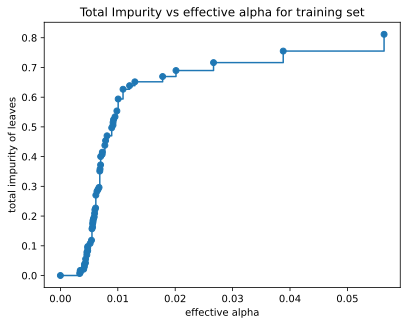

In [46]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [47]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1276110963980701


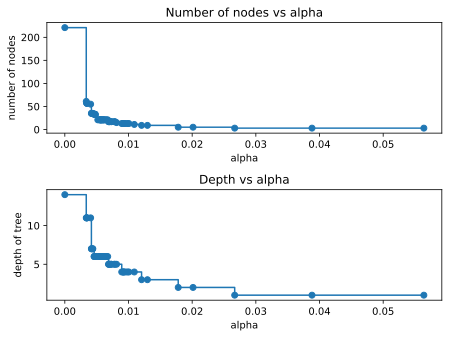

In [48]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [67]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]


data = {'train': train_scores,
        'test': test_scores}
scores = pd.DataFrame(data, index = ccp_alphas)
scores['diff'] = scores['train'] - scores['test']
scores.sort_values('diff', ascending=False)

,train,test,diff
0.000000,1.000000,0.703448,0.296552
0.003368,0.886010,0.772414,0.113597
0.003454,0.880829,0.772414,0.108415
0.003454,0.880829,0.772414,0.108415
0.003454,0.880829,0.772414,0.108415
0.004056,0.877375,0.772414,0.104961
0.004175,0.844560,0.813793,0.030766
0.004192,0.844560,0.813793,0.030766
0.004368,0.844560,0.813793,0.030766
0.004396,0.844560,0.813793,0.030766


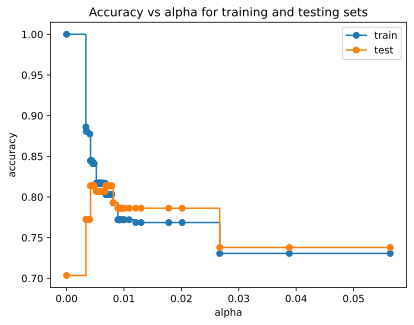

In [58]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [73]:
### --- from what I've seen, ccp_alpha pruning basically does the same thing as max_depth but more precisely and iteratively ---
### --- with the same goal of avoiding overfitting ---

Model performance on test set: 
Accuracy 0.7931
Precision 0.6383
Recall 0.6977
F1 0.6667

Model performance on training set: 
Accuracy 0.8549
Precision 0.8389
Recall 0.7330
F1 0.7824

Difference in Performance: 
Accuracy 0.0618
Precision 0.2006
Recall 0.0353
F1 0.1157


[Text(0.5555555555555556, 0.9545454545454546, 'Glucose <= 127.5\nentropy = 0.939\nsamples = 579\nvalue = [373, 206]\nclass = No Diabetes'),
 Text(0.2962962962962963, 0.8636363636363636, 'BMI <= 26.95\nentropy = 0.721\nsamples = 361\nvalue = [289, 72]\nclass = No Diabetes'),
 Text(0.25925925925925924, 0.7727272727272727, 'entropy = 0.079\nsamples = 102\nvalue = [101, 1]\nclass = No Diabetes'),
 Text(0.3333333333333333, 0.7727272727272727, 'Age <= 28.5\nentropy = 0.847\nsamples = 259\nvalue = [188, 71]\nclass = No Diabetes'),
 Text(0.18518518518518517, 0.6818181818181818, 'BMI <= 45.4\nentropy = 0.603\nsamples = 129\nvalue = [110, 19]\nclass = No Diabetes'),
 Text(0.14814814814814814, 0.5909090909090909, 'DiabetesPedigreeFunction <= 0.5\nentropy = 0.552\nsamples = 125\nvalue = [109, 16]\nclass = No Diabetes'),
 Text(0.07407407407407407, 0.5, 'SkinThickness <= 5.0\nentropy = 0.353\nsamples = 75\nvalue = [70, 5]\nclass = No Diabetes'),
 Text(0.037037037037037035, 0.4090909090909091, 'entro

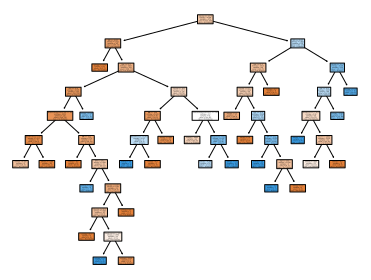

In [79]:
### Training with ccp_alpha value
### Train the model
### try using different ccp_alpha value from table above
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', ccp_alpha=0.008124)
clf.fit(X_train, y_train)

### Qualitative Evaluation
test_set_y_preds = clf.predict(X_test)
print("Model performance on test set: ")
test_acc = accuracy_score(y_test, test_set_y_preds)
test_prec = precision_score(y_test, test_set_y_preds)
test_rec = recall_score(y_test, test_set_y_preds)
test_f1 = f1_score(y_test, test_set_y_preds)
print("Accuracy %.4f" % test_acc)
print("Precision %.4f" % test_prec)
print("Recall %.4f" % test_rec)
print("F1 %.4f" % test_f1)

print("\nModel performance on training set: ")
training_set_y_preds = clf.predict(X_train)
train_acc = accuracy_score(y_train, training_set_y_preds)
train_prec = precision_score(y_train, training_set_y_preds)
train_rec = recall_score(y_train, training_set_y_preds)
train_f1 = f1_score(y_train, training_set_y_preds)
print("Accuracy %.4f" % train_acc)
print("Precision %.4f" % train_prec)
print("Recall %.4f" % train_rec)
print("F1 %.4f" % train_f1)

print("\nDifference in Performance: ")
print("Accuracy %.4f" % (train_acc-test_acc))
print("Precision %.4f" % (train_prec-test_prec))
print("Recall %.4f" % (train_rec-test_rec))
print("F1 %.4f" % (train_f1-test_f1))


### Display the current tree
plot_tree(clf, feature_names = list(X.columns), class_names = ['No Diabetes', 'Diabetes'],filled = True)

In [69]:
featureImportance = pd.DataFrame(clf.feature_importances_, index = X.columns).sort_values(0, ascending=False)
featureImportance

,0
Glucose,0.386415
BMI,0.309367
Age,0.135154
BloodPressure,0.067680
DiabetesPedigreeFunction,0.042675
Insulin,0.020740
Pregnancies,0.019083
SkinThickness,0.018887
